## Notación.
P: Problema.

A: Aclaraciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import random as rm
import math

4.6974690865169295 7.224874790235402


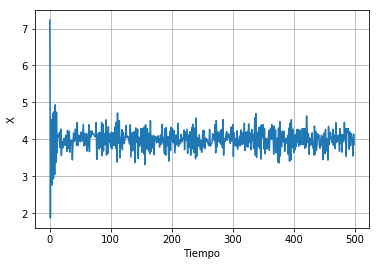

In [114]:
e_t = []

dt = 1
t = 0

x = 0
paso = 0.01
setpoint = 4

N = 1000
medicion = 500

## ------------------ ** ------------------ ##
# Asumo que tengo una partícula que esta desplazando aleatoriamente unidimensionalmente.
# Genero N movimientos al azar y los voy sumando.
# Al final tengo una posición x.
# Mi error es igual a la diferencia entre el setpoint (valor en donde quiero dejar a la particula) y la posición en donde quede.
# IMPORTANTE: Cada "N" pasos de la particula, realiza un ajuste de su posición. Esta la ajusto "medicion" veces.
# T = []
# X = []
# K_p = 1.75
# K_i = 0.5
# for _ in range (medicion):
#     for _ in range (N):
#         val_azar = rm.uniform (-paso,paso)
#         x = x + val_azar
#     e_t.append (setpoint - x)
#     T.append (t)
#     #Factor integral que va teniendo en cuenta el paso del tiempo y el error acumulado en este.
#     e_t_i = sp.integrate.simps (e_t,T)
#     # Es lo mismo que e_t pero lo defino porque e_t es una lista que uso para e_t_i y e_t_1 es el valor del error en este momento
#     # el cual utilizo para ajustar la posición.
#     e_t_1 = setpoint - x 
#     t = t + dt
#     x = x + K_p * e_t_1 + K_i * e_t_i
#     X.append (x)
    
## ------------------ ** ------------------ ##
plt.xlabel ("Tiempo")
plt.ylabel ("X")
plt.plot (T,X)
## ------------------ ** ------------------ ##
plt.grid()
plt.show ()

### Simulación PI para Grilla periódica.

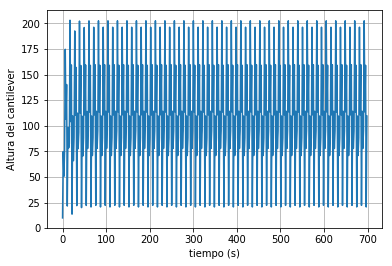

In [255]:
# Características de la grilla. (Para una superficie rugosa poner un valor de y que sea aleatorio)
pixeles = 450
x = np.linspace (0,100,pixeles)
y = []
altura_grilla = 100

# Modelado grilla.
for i in range (len(x)):
    if i % 7 == 0:
        y.append (altura_grilla)
    elif (i - 1) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 2) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 3) % 7 == 0:
        y.append (altura_grilla)
    else:
        y.append (0)

## ------------------ ** ------------------ ##
# Características del lazo.
# El cantilever tiene que tener una altura mayor a la del máximo de la muestra porque sino cuando llega al valor de x tal que
# la muestra tiene altura 100, si el setpoint es menor a 100, se rompe.
setpoint = 110 

alt_canti = []
e_t = []
T = []

total = 700 # Tiempo total en recorrer cada linea.
tiempo_por_pixel = total/pixeles
respuesta_lazo = 1 # Representa el tiempo que le toma al lazo corregir. Tiene que ser menor que el tiempo por pixel.

## ------------------ ** ------------------ ##    
# De esta manera el lazo logra corregirse 2 veces en cada posición.
# Cantidad de correcciones esta dada por: a) tiempo que estoy en cada pixel, b) tiempo de respuesta del lazo.
# En este caso como el tiempo que esta en cada pixel es mayor al tiempo de respuesta del lazo, logra corregir la altura mas de 
# una vez antes de cambiar de posición.
N = int(tiempo_por_pixel/respuesta_lazo)

## ------------------ ** ------------------ ##    
# Condiciones iniciales.
distancia_canti_muestra = setpoint
t = 0 
K_p = 1.6479
K_i = 0.1694

for i in range (len(x)):
    distancia_canti_muestra = distancia_canti_muestra - y[i]
    for _ in range (N):
        e_t.append (setpoint - distancia_canti_muestra) 
        T.append (t)
        e_t_i = sp.integrate.simps (e_t,T)
        e_t_1 = setpoint - distancia_canti_muestra
        alt_canti.append (distancia_canti_muestra)
        distancia_canti_muestra = distancia_canti_muestra + K_p * e_t_1 + K_i * e_t_i
    t = t + tiempo_por_pixel # i recorre cada posición x, x tiene cada pixel, en cada pixel estoy tiempo_por_pixel.

plt.plot (T,alt_canti)
plt.xlabel ("tiempo (s)")
plt.ylabel ("Altura del cantilever")

## ------------------ ** ------------------ ##
plt.grid ()
plt.show ()

### Misma simulación de lazo de control para grilla, pero con ajuste de parámetros Kp y Ki. Varias opciones.

In [ ]:
# Características de la grilla. (Para una superficie rugosa poner un valor de y que sea aleatorio)
pixeles = 450
x = np.linspace (0,100,pixeles)
y = []
altura_grilla = 100

# Modelado grilla.
for i in range (len(x)):
    if i % 7 == 0:
        y.append (altura_grilla)
    elif (i - 1) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 2) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 3) % 7 == 0:
        y.append (altura_grilla)
    else:
        y.append (0)

## ------------------ ** ------------------ ##
# Características del lazo.
# El cantilever tiene que tener una altura mayor a la del máximo de la muestra porque sino cuando llega al valor de x tal que
# la muestra tiene altura 100, si el setpoint es menor a 100, se rompe.
setpoint = 110 

total = 700 # Tiempo total en recorrer cada linea.
tiempo_por_pixel = total/pixeles
respuesta_lazo = 1 # Representa el tiempo que le toma al lazo corregir. Tiene que ser menor que el tiempo por pixel.

## ------------------ ** ------------------ ##    
# De esta manera el lazo logra corregirse 2 veces en cada posición.
# Cantidad de correcciones esta dada por: a) tiempo que estoy en cada pixel, b) tiempo de respuesta del lazo.
# En este caso como el tiempo que esta en cada pixel es mayor al tiempo de respuesta del lazo, logra corregir la altura mas de 
# una vez antes de cambiar de posición.
N = int(tiempo_por_pixel/respuesta_lazo)

## ------------------ ** ------------------ ##    
# Condiciones iniciales.
aux = 140 
vuelta = 0
K_p = 1.233
K_i = 1.123
dt = 0.001
while aux > 130 or vuelta == 1000:
    distancia_canti_muestra = setpoint
    t = 0 
    alt_canti = []
    e_t = []
    T = []
    K_p = K_p + dt
    K_i = K_i + dt
    for i in range (len(x)):
        distancia_canti_muestra = distancia_canti_muestra - y[i]
        for _ in range (N):
            e_t.append (setpoint - distancia_canti_muestra) 
            T.append (t)
            e_t_i = sp.integrate.simps (e_t,T)
            e_t_1 = setpoint - distancia_canti_muestra
            alt_canti.append (distancia_canti_muestra)
            distancia_canti_muestra = distancia_canti_muestra + K_p * e_t_1 + K_i * e_t_i
        t = t + tiempo_por_pixel # i recorre cada posición x, x tiene cada pixel, en cada pixel estoy tiempo_por_pixel.
    aux = max(alt_canti[int((len(alt_canti)/2)):])
    vuelta = vuelta + 1

plt.plot (T,alt_canti)
plt.xlabel ("tiempo (s)")
plt.ylabel ("Altura del cantilever")

## ------------------ ** ------------------ ##
plt.grid ()
plt.show ()

In [254]:
# LA DIFERENCIA AHORA ES QUE AJUSTO DE A UN PARÁMETRO POR VEZ.

# Características de la grilla. (Para una superficie rugosa poner un valor de y que sea aleatorio)
pixeles = 450
x = np.linspace (0,100,pixeles)
y = []
altura_grilla = 100

# Modelado grilla.
for i in range (len(x)):
    if i % 7 == 0:
        y.append (altura_grilla)
    elif (i - 1) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 2) % 7 == 0:
        y.append (altura_grilla)
    elif (i - 3) % 7 == 0:
        y.append (altura_grilla)
    else:
        y.append (0)

## ------------------ ** ------------------ ##
# Características del lazo.
# El cantilever tiene que tener una altura mayor a la del máximo de la muestra porque sino cuando llega al valor de x tal que
# la muestra tiene altura 100, si el setpoint es menor a 100, se rompe.
setpoint = 110 

total = 700 # Tiempo total en recorrer cada linea.
tiempo_por_pixel = total/pixeles
respuesta_lazo = 1 # Representa el tiempo que le toma al lazo corregir. Tiene que ser menor que el tiempo por pixel.

## ------------------ ** ------------------ ##    
# De esta manera el lazo logra corregirse 2 veces en cada posición.
# Cantidad de correcciones esta dada por: a) tiempo que estoy en cada pixel, b) tiempo de respuesta del lazo.
# En este caso como el tiempo que esta en cada pixel es mayor al tiempo de respuesta del lazo, logra corregir la altura mas de 
# una vez antes de cambiar de posición.
N = int(tiempo_por_pixel/respuesta_lazo)

## ------------------ ** ------------------ ##    
# # Condiciones iniciales.
aux = 140 
vueltas = 1000
K_p = 1.6479
K_i = 1.1694
dt = 0.001
aux2 = []
aux3 = []
aux4 = []
for _ in range (vueltas):
    distancia_canti_muestra = setpoint
    t = 0 
    alt_canti = []
    e_t = []
    T = []
    K_i = K_i - dt
    for i in range (len(x)):
        distancia_canti_muestra = distancia_canti_muestra - y[i]
        for _ in range (N):
            e_t.append (setpoint - distancia_canti_muestra) 
            T.append (t)
            e_t_i = sp.integrate.simps (e_t,T)
            e_t_1 = setpoint - distancia_canti_muestra
            alt_canti.append (distancia_canti_muestra)
            distancia_canti_muestra = distancia_canti_muestra + K_p * e_t_1 + K_i * e_t_i
        t = t + tiempo_por_pixel # i recorre cada posición x, x tiene cada pixel, en cada pixel estoy tiempo_por_pixel.
    # En c/loop máxima desviación del setpoint a partir de la mitad del tiempo.
    aux2.append(max(alt_canti[int((len(alt_canti)/2)):]))
    # En c/loop almaceno que K_p dió las alturas en cuestion, luego me quedo con el K_p que dio menor desviación del setpoint.
    aux4.append (K_i)
print (aux4[aux2.index(min(aux2))])
# plt.plot (T,alt_canti)
# plt.xlabel ("tiempo (s)")
# plt.ylabel ("Altura del cantilever")

# ## ------------------ ** ------------------ ##
# plt.grid ()
# plt.show ()

0.16940000000001787


Kp = 1.6529 con Ki = 1.123 Minimiza el error en la altura del cantilever.
Ki = 1.1694 con Kp = 1.6529 Minimiza el error en la altura del cantilever.

# Mejoras.

1) Asumí que la punti del cantilever solo se mueve cuando el lazo la ajusta.---> Le puedo poner ruido, metiéndole que se mueva verticalmente un poco alrededor de su posición. le sumo una variable aleatoria (-1,1).

# CONSULTAR

1) Como hacemos un cuaderno de labo digital como los que nos mando Stefani al mail.
2) ¿Cómo encuentro aquellos parámetros K_p y K_i tales que a partir de un determinado t la muestra oscila poco alrededor del setpoint?